### Assignment, due Friday, 09 June 2023
## Problem 4 Tau Identification
In this problem, we will investigate a “toy example” of tau identification at a particle physics experiment like ATLAS. You are free to use whatever data analysis program that you are familiar with. I use the package Root provided for free by CERN scientists (see root.cern.ch). But you will probably be more comfortable with analysis packages you have used in other courses. 

Pseudo-data has been placed on StudIP for the purposes of tau identification. There are four files: signal training.txt, signal testing.txt, background training.txt, and background testing.txt 

These files contain pseudo-data corresponding to hadronically decaying tau leptons (signal) and jets (background). Each line of numbers corresponds to values for each candidate object, for the following kinematic variables (see lecture slides):

• Calorimeter radius: $R_{cal}$ \
• Energy in isolation region: $E^{iso}_{T}$ \
• Transverse flight path significance: $S^{flight}_{T}$ \
• Number of tracks in isolation region: $N^{iso}_{trk}$

The distributions should look different for signal and background.

In [1]:
%%bash
python3.11 -m pip install --upgrade pip
pip3 install numpy pandas matplotlib scipy scikit-learn seaborn tqdm tensorflow onnx tf2onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 451.2/451.2 kB 10.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.3/400.3 kB 9.8 MB/s eta 0:00:00
  Using cached termcolor-2.3.0-py3-none-any.whl 

(a) Using the files signal training.txt and background training.txt plot the probability distribution functions for signal and background candidates for each of the four variables. If possible, it’s best to plot signal and background PDFs on the same plot, so we can directly compare the distributions. Don’t forget to normalize your distributions, such that the integral of the PDF is equal to 1.

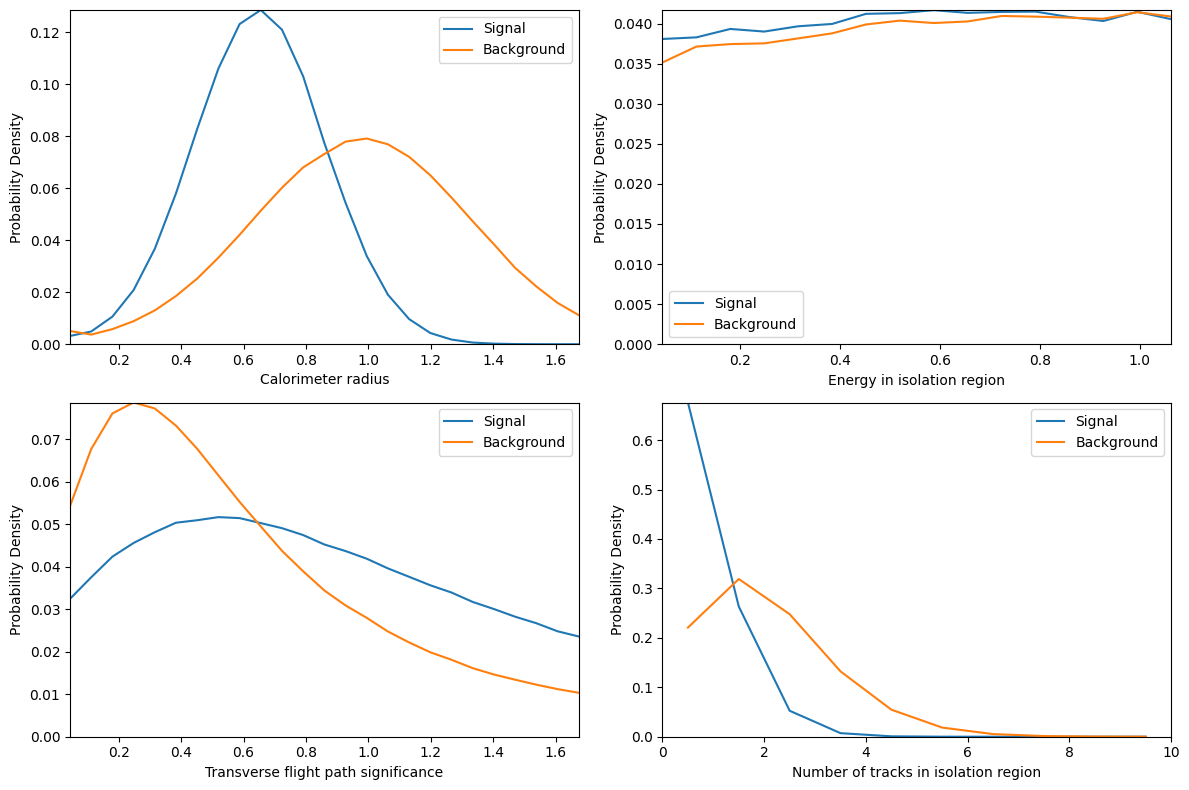

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the data
signal_data = np.loadtxt('signal_training.txt')  # Load signal training data from file
background_data = np.loadtxt('background_training.txt')  # Load background training data from file

# Step 2: Calculate the PDFs
variables = ['Calorimeter radius', 'Energy in isolation region', 'Transverse flight path significance', 'Number of tracks in isolation region']
bins = 25  # Number of bins for histogram

# Create subplots for each variable
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1 - Calorimeter radius
variable = variables[0]
ax = axs[0, 0]

signal_pdf, bins = np.histogram(signal_data[:, 0], bins=bins, density=True)
background_pdf, _ = np.histogram(background_data[:, 0], bins=bins, density=True)

bin_centers = 0.5 * (bins[:-1] + bins[1:])

signal_pdf /= np.sum(signal_pdf)
background_pdf /= np.sum(background_pdf)

ax.plot(bin_centers, signal_pdf, label='Signal')
ax.plot(bin_centers, background_pdf, label='Background')
ax.set_xlim([bin_centers[0], bin_centers[-1]])
ax.set_ylim([0, max(np.max(signal_pdf), np.max(background_pdf))])
ax.set_xlabel(variable)
ax.set_ylabel('Probability Density')
ax.legend()

# Plot 2 - Energy in isolation region
variable = variables[1]
ax = axs[0, 1]

signal_pdf, bins = np.histogram(signal_data[:, 1], bins=bins, density=True)
background_pdf, _ = np.histogram(background_data[:, 1], bins=bins, density=True)

bin_centers = 0.5 * (bins[:-1] + bins[1:])

signal_pdf /= np.sum(signal_pdf)
background_pdf /= np.sum(background_pdf)

ax.plot(bin_centers, signal_pdf, label='Signal')
ax.plot(bin_centers, background_pdf, label='Background')
ax.set_xlim([bin_centers[0], bin_centers[-10]])
ax.set_ylim([0, max(np.max(signal_pdf), np.max(background_pdf))])
ax.set_xlabel(variable)
ax.set_ylabel('Probability Density')
ax.legend()

# Plot 3 - Transverse flight path significance
variable = variables[2]
ax = axs[1, 0]

signal_pdf, bins = np.histogram(signal_data[:, 2], bins=bins, density=True)
background_pdf, _ = np.histogram(background_data[:, 2], bins=bins, density=True)

bin_centers = 0.5 * (bins[:-1] + bins[1:])

signal_pdf /= np.sum(signal_pdf)
background_pdf /= np.sum(background_pdf)

ax.plot(bin_centers, signal_pdf, label='Signal')
ax.plot(bin_centers, background_pdf, label='Background')
ax.set_xlim([bin_centers[0], bin_centers[-1]])
ax.set_ylim([0, max(np.max(signal_pdf), np.max(background_pdf))])
ax.set_xlabel(variable)
ax.set_ylabel('Probability Density')
ax.legend()

# Plot 4 - Number of tracks in isolation region
variable = variables[3]
ax = axs[1, 1]

bins_4 = np.arange(0, 11)  # Bins for the fourth plot
signal_pdf, bins = np.histogram(signal_data[:, 3], bins=bins_4, density=True)
background_pdf, _ = np.histogram(background_data[:, 3], bins=bins_4, density=True)

bin_centers = 0.5 * (bins[:-1] + bins[1:])

signal_pdf /= np.sum(signal_pdf)
background_pdf /= np.sum(background_pdf)

ax.plot(bin_centers, signal_pdf, label='Signal')
ax.plot(bin_centers, background_pdf, label='Background')
ax.set_xlim([0, 10])
ax.set_ylim([0, max(np.max(signal_pdf), np.max(background_pdf))])
ax.set_xlabel(variable)
ax.set_ylabel('Probability Density')
ax.legend()

plt.tight_layout()
plt.show()

(b) For signal and background separately, check if there are correlations between these four variables? Which variables exhibit the largest correlation, and what is the linear correlation factor for those variables? Can you plot a 2-dimensional histogram for those variables?

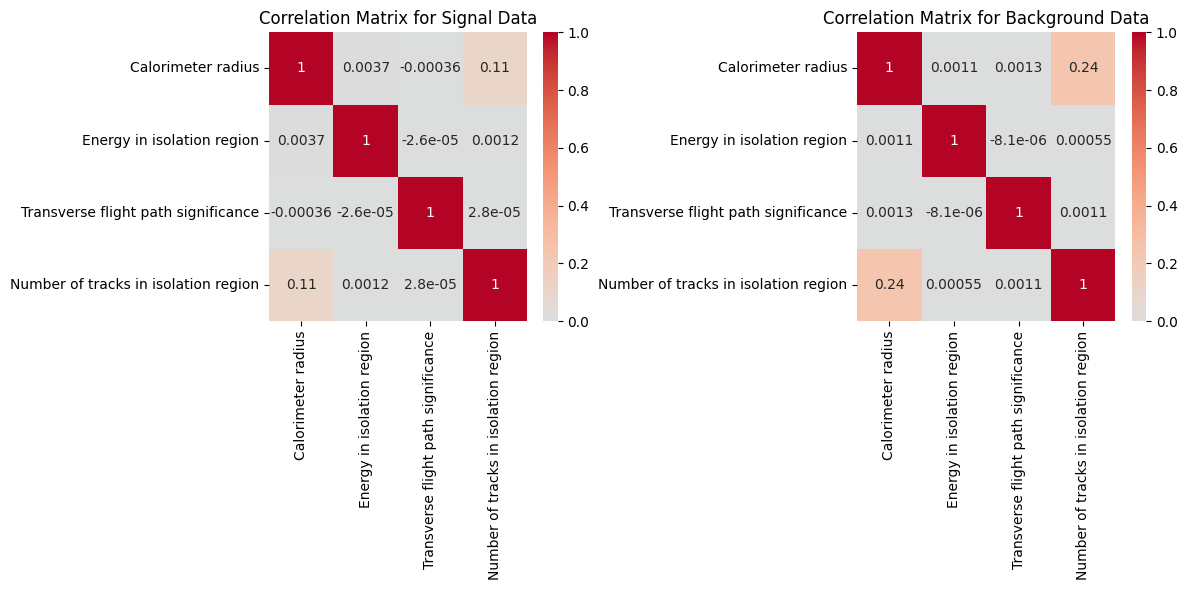

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the data
signal_data = np.loadtxt('signal_training.txt')  # Load signal training data from file
background_data = np.loadtxt('background_training.txt')  # Load background training data from file

# Convert to Pandas DataFrames for easier manipulation
variables = ['Calorimeter radius', 'Energy in isolation region', 'Transverse flight path significance', 'Number of tracks in isolation region']
signal_df = pd.DataFrame(signal_data, columns=variables)
background_df = pd.DataFrame(background_data, columns=variables)

# Step 2: Compute and visualize correlation matrices
plt.figure(figsize=(12, 6))

plt.subplot(121)
sns.heatmap(signal_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Signal Data')

plt.subplot(122)
sns.heatmap(background_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Background Data')

plt.tight_layout()
plt.show()


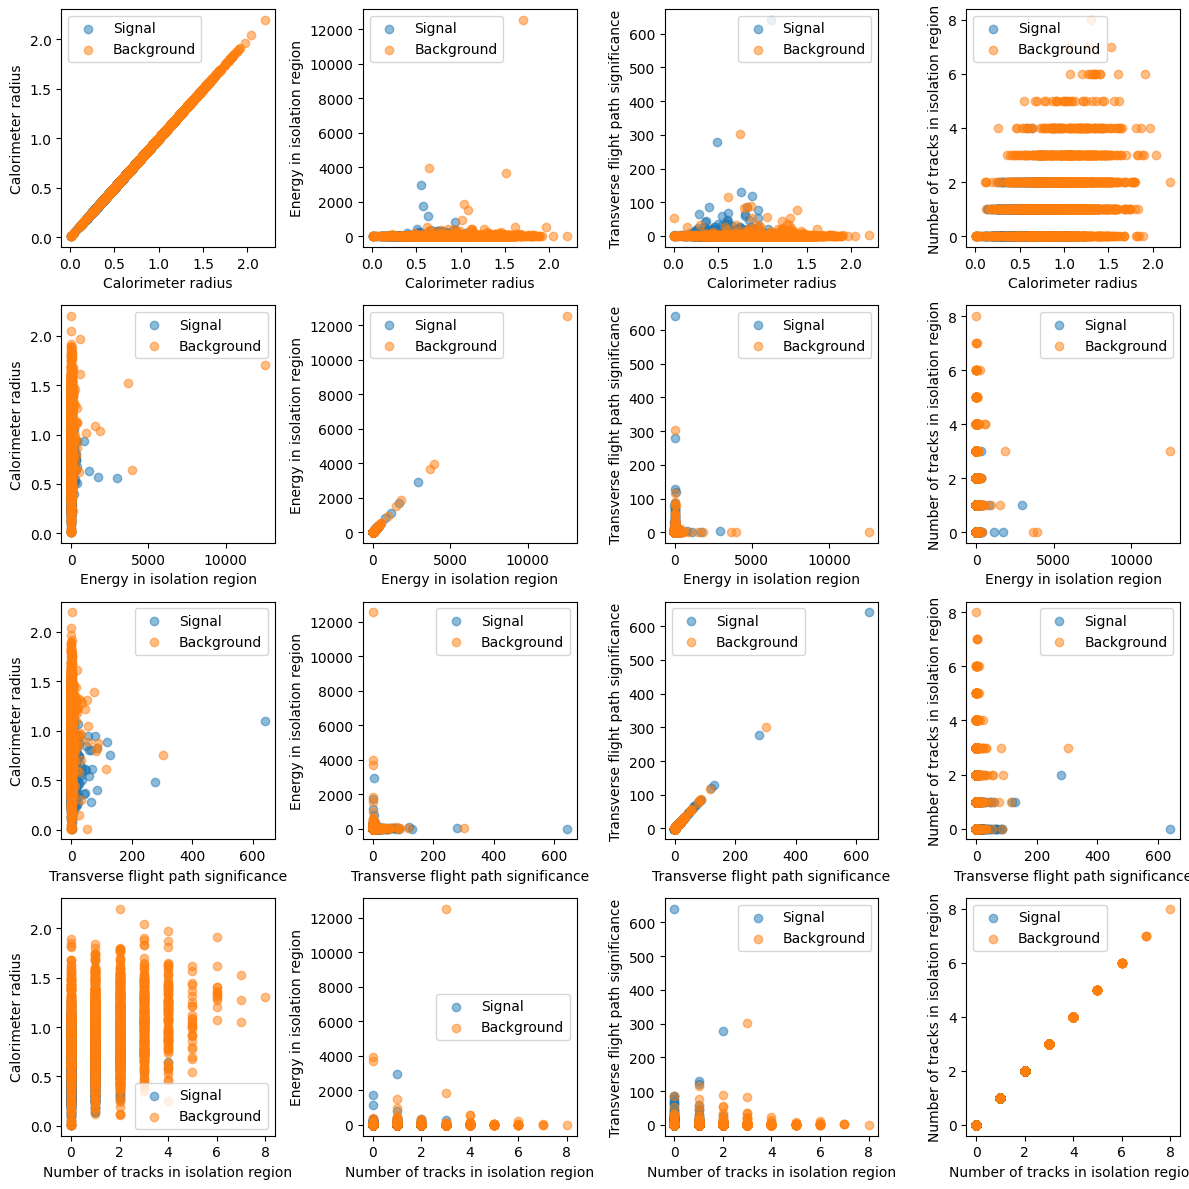

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the data
signal_data = np.loadtxt('signal_training.txt')  # Load signal training data from file
background_data = np.loadtxt('background_training.txt')  # Load background training data from file

# Convert to Pandas DataFrames for easier manipulation
variables = ['Calorimeter radius', 'Energy in isolation region', 'Transverse flight path significance', 'Number of tracks in isolation region']
signal_df = pd.DataFrame(signal_data, columns=variables)
background_df = pd.DataFrame(background_data, columns=variables)

# Step 2: Reduce the resolution to 0.1% of the data
signal_df_sampled = signal_df.sample(frac=0.001, random_state=42)
background_df_sampled = background_df.sample(frac=0.001, random_state=42)

# Step 3: Create scatter plots for the sampled data
fig, axes = plt.subplots(len(variables), len(variables), figsize=(12, 12))

for i, var1 in enumerate(variables):
    for j, var2 in enumerate(variables):
        axes[i, j].scatter(signal_df_sampled[var1], signal_df_sampled[var2], label='Signal', alpha=0.5)
        axes[i, j].scatter(background_df_sampled[var1], background_df_sampled[var2], label='Background', alpha=0.5)
        axes[i, j].set_xlabel(var1)
        axes[i, j].set_ylabel(var2)
        axes[i, j].legend()

plt.tight_layout()
plt.show()


(c) Evaluate a projective log-likelihood for the candidates in signal testing.txt and background testing.txt. Plot the log-likelihood distributions for the testing signal and background samples (on the same plot, if possible). Note that the log-likelihood should be calculated with the help of the PDFs you obtained from the training samples:

$$ \ln\ell = \sum \limits_{i=1}^{n}\ln( P (x_{i}|s) - \sum \limits_{i=1}^{n}\ln( P (x_{i}|b)$$

where $i$ loops over the four variables provided. You may have to take special care to avoid problems coming from empty bins in your PDFs.

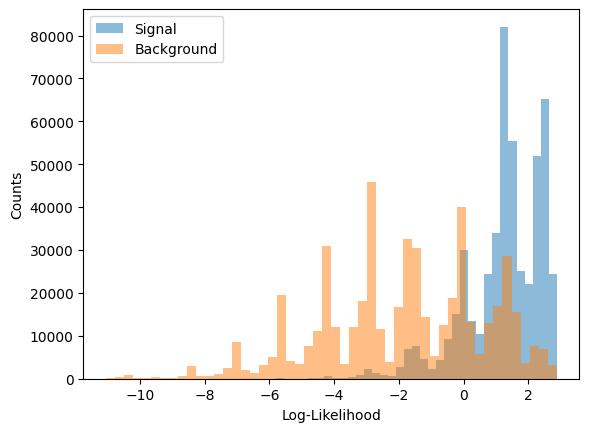

In [8]:
# Step 1: Load the testing data
signal_test_data = np.loadtxt('signal_testing.txt')  # Load signal testing data from file
background_test_data = np.loadtxt('background_testing.txt')  # Load background testing data from file

# Step 2: Compute the log-likelihood for each data point in the testing sets
def log_likelihood(data, signal_pdfs, background_pdfs, bins_per_variable):
    likelihoods = []
    for point in data:
        likelihoods_for_variables = []
        for i, var in enumerate(point):
            index = np.digitize(var, bins_per_variable[i]) - 1
            if index >= len(signal_pdfs[i]) or index < 0: continue
            p_s = signal_pdfs[i][index]
            p_b = background_pdfs[i][index]
            if p_s > 0 and p_b > 0:
                likelihoods_for_variables.append(np.log(p_s) - np.log(p_b))
        likelihoods.append(sum(likelihoods_for_variables))
    return np.array(likelihoods)

# Compute PDFs and bins for each variable
signal_pdfs = []
background_pdfs = []
bins_per_variable = []

for i in range(4):
    signal_pdf_i, bins_i = np.histogram(signal_data[:, i], bins=bins, density=True)
    background_pdf_i, _ = np.histogram(background_data[:, i], bins=bins, density=True)
    signal_pdfs.append(signal_pdf_i)
    background_pdfs.append(background_pdf_i)
    bins_per_variable.append(bins_i)

# Compute log likelihoods for the testing datasets
log_likelihood_signal = log_likelihood(signal_test_data, signal_pdfs, background_pdfs, bins_per_variable)
log_likelihood_background = log_likelihood(background_test_data, signal_pdfs, background_pdfs, bins_per_variable)

# Step 3: Plot the log-likelihood distributions
plt.hist(log_likelihood_signal, bins=50, alpha=0.5, label='Signal')
plt.hist(log_likelihood_background, bins=50, alpha=0.5, label='Background')
plt.xlabel('Log-Likelihood')
plt.ylabel('Counts')
plt.legend()
plt.show()


(d) Based upon the plots of the projective log-likelihood, obtain a ROC (receiver-operating-characteristics) curve for this discriminant. The x-axis of the ROC curve should contain the signal efficiency, whereas the y-axis should contain the background rejection (specify if you use
Rb = 1 − εb or Rb = 1/εb for the y-axis).

Testing Datensatz

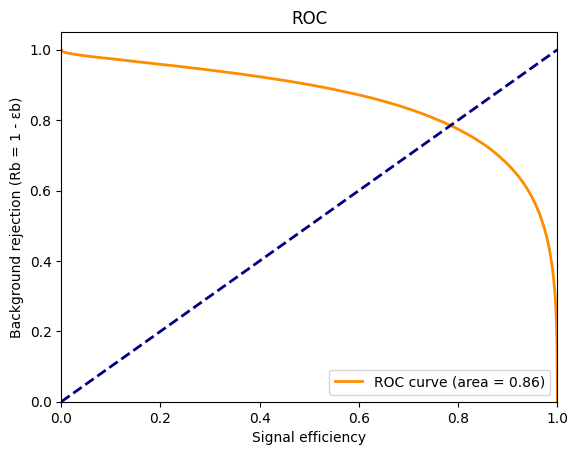

In [9]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the data.
signal_train = np.loadtxt('signal_training.txt')
background_train = np.loadtxt('background_training.txt')
signal_test = np.loadtxt('signal_testing.txt')
background_test = np.loadtxt('background_testing.txt')

# Combine signal and background to make the training set.
X_train = np.concatenate([signal_train, background_train])
y_train = np.concatenate([np.ones(signal_train.shape[0]), np.zeros(background_train.shape[0])])

# Train a logistic regression model.
model = LogisticRegression().fit(X_train, y_train)

# Combine signal and background to make the test set.
X_test = np.concatenate([signal_test, background_test])
y_test = np.concatenate([np.ones(signal_test.shape[0]), np.zeros(background_test.shape[0])])

# Predict the probabilities of signal.
y_score = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(tpr, 1-fpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Signal efficiency')
plt.ylabel('Background rejection (Rb = 1 - εb)')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()


(e) Compare with the ROC curve obtained using one variable only (i.e. such as Rcal). Does the projective likelihood perform better than the single variable in terms of separation power?

Training datensatz

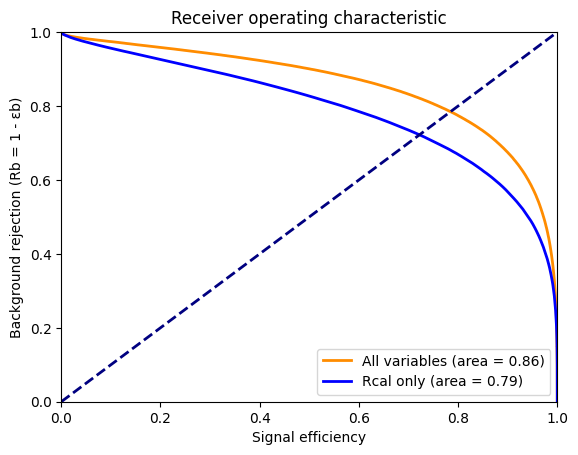

In [10]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the data.
signal_train = np.loadtxt('signal_training.txt')
background_train = np.loadtxt('background_training.txt')
signal_test = np.loadtxt('signal_testing.txt')
background_test = np.loadtxt('background_testing.txt')

# Combine signal and background to make the training set.
X_train = np.concatenate([signal_train, background_train])
y_train = np.concatenate([np.ones(signal_train.shape[0]), np.zeros(background_train.shape[0])])

# Combine signal and background to make the test set.
X_test = np.concatenate([signal_test, background_test])
y_test = np.concatenate([np.ones(signal_test.shape[0]), np.zeros(background_test.shape[0])])

# Train a logistic regression model using all variables.
model_all = LogisticRegression().fit(X_train, y_train)

# Train a logistic regression model using only Rcal (assuming it's the first column).
model_Rcal = LogisticRegression().fit(X_train[:, 0].reshape(-1, 1), y_train)

# Predict the probabilities of signal.
y_score_all = model_all.predict_proba(X_test)[:, 1]
y_score_Rcal = model_Rcal.predict_proba(X_test[:, 0].reshape(-1, 1))[:, 1]

# Compute ROC curve and ROC area for each class
fpr_all, tpr_all, _ = roc_curve(y_test, y_score_all)
roc_auc_all = auc(fpr_all, tpr_all)

fpr_Rcal, tpr_Rcal, _ = roc_curve(y_test, y_score_Rcal)
roc_auc_Rcal = auc(fpr_Rcal, tpr_Rcal)

# Plot ROC curves
plt.figure()
lw = 2
plt.plot(tpr_all, 1-fpr_all, color='darkorange', lw=lw, label='All variables (area = %0.2f)' % roc_auc_all)
plt.plot(tpr_Rcal, 1-fpr_Rcal, color='blue', lw=lw, label='Rcal only (area = %0.2f)' % roc_auc_Rcal)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Signal efficiency')
plt.ylabel('Background rejection (Rb = 1 - εb)')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


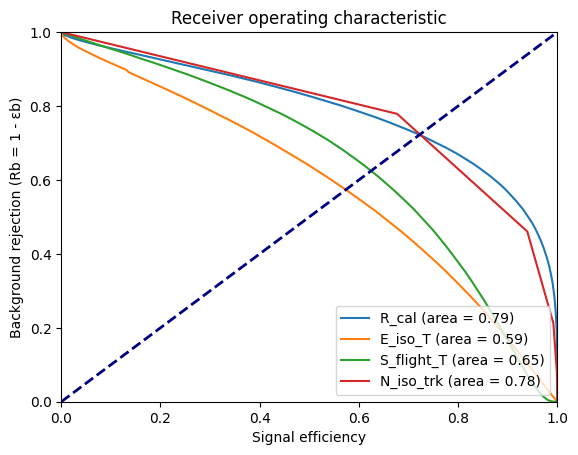

In [11]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the data.
signal_train = np.loadtxt('signal_training.txt')
background_train = np.loadtxt('background_training.txt')
signal_test = np.loadtxt('signal_testing.txt')
background_test = np.loadtxt('background_testing.txt')

# Combine signal and background to make the training set.
X_train = np.concatenate([signal_train, background_train])
y_train = np.concatenate([np.ones(signal_train.shape[0]), np.zeros(background_train.shape[0])])

# Combine signal and background to make the test set.
X_test = np.concatenate([signal_test, background_test])
y_test = np.concatenate([np.ones(signal_test.shape[0]), np.zeros(background_test.shape[0])])

# Define variables names
variables = ['R_cal', 'E_iso_T', 'S_flight_T', 'N_iso_trk']

plt.figure()
lw = 2

# Loop over each variable
for i in range(4):
    # Train a logistic regression model using only the ith variable.
    model = LogisticRegression().fit(X_train[:, i].reshape(-1, 1), y_train)

    # Predict the probabilities of signal.
    y_score = model.predict_proba(X_test[:, i].reshape(-1, 1))[:, 1]

    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(tpr, 1-fpr, label=f'{variables[i]} (area = {roc_auc:.2f})')

# Add details to the plot
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Signal efficiency')
plt.ylabel('Background rejection (Rb = 1 - εb)')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


(f) Train a BDT or Neural Network to separate the signal from background, based on the training data. Using the testing data, plot the BDT or NN distribution, and compare the corresponding ROC curve with that of the projective likelihood.

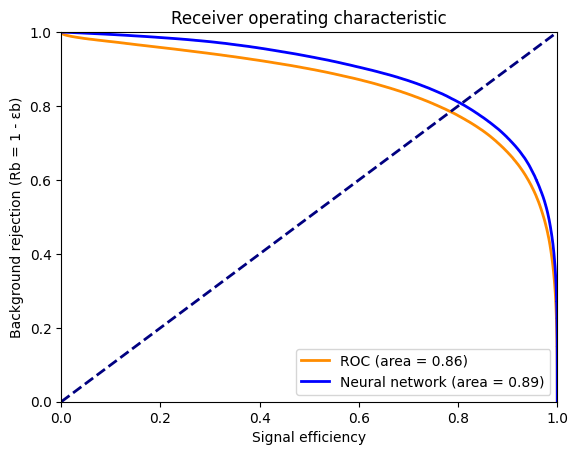

In [12]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the data.
signal_train = np.loadtxt('signal_training.txt')
background_train = np.loadtxt('background_training.txt')
signal_test = np.loadtxt('signal_testing.txt')
background_test = np.loadtxt('background_testing.txt')

# Combine signal and background to make the training set.
X_train = np.concatenate([signal_train, background_train])
y_train = np.concatenate([np.ones(signal_train.shape[0]), np.zeros(background_train.shape[0])])

# Combine signal and background to make the test set.
X_test = np.concatenate([signal_test, background_test])
y_test = np.concatenate([np.ones(signal_test.shape[0]), np.zeros(background_test.shape[0])])

# Train a logistic regression model.
model_lr = LogisticRegression().fit(X_train, y_train)

# Train a neural network model.
model_nn = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000).fit(X_train, y_train)

# Predict the probabilities of signal.
y_score_lr = model_lr.predict_proba(X_test)[:, 1]
y_score_nn = model_nn.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_nn, tpr_nn, _ = roc_curve(y_test, y_score_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Plot ROC curves
plt.figure()
lw = 2
plt.plot(tpr_lr, 1-fpr_lr, color='darkorange', lw=lw, label='ROC (area = %0.2f)' % roc_auc_lr)
plt.plot(tpr_nn, 1-fpr_nn, color='blue', lw=lw, label='Neural network (area = %0.2f)' % roc_auc_nn)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Signal efficiency')
plt.ylabel('Background rejection (Rb = 1 - εb)')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


Submission should be via email to <EMAIL> You should submit a pdf file with the plots of the PDFs of the four variables, the distributions of the projective log-likelihood and BDT/NN for signal and for background, as well as the ROC curve(s). In addition, the program file you used to calculate and obtain these plots should also be submitted.

/home/vscode/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


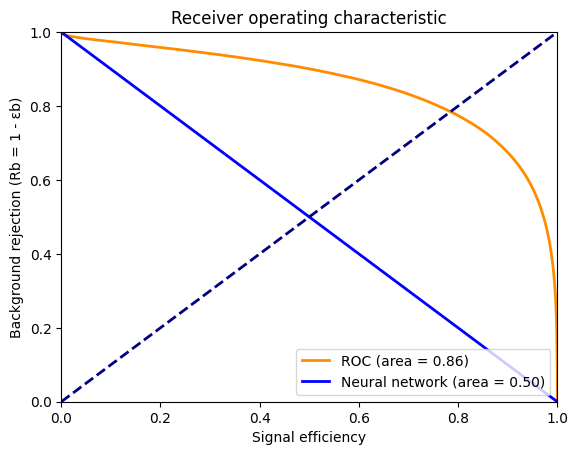

In [18]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the data.
signal_train = np.loadtxt('signal_training.txt')
background_train = np.loadtxt('background_training.txt')
signal_test = np.loadtxt('signal_testing.txt')
background_test = np.loadtxt('background_testing.txt')

# Combine signal and background to make the training set.
X_train = np.concatenate([signal_train, background_train])
y_train = np.concatenate([np.ones(signal_train.shape[0]), np.zeros(background_train.shape[0])])

# Combine signal and background to make the test set.
X_test = np.concatenate([signal_test, background_test])
y_test = np.concatenate([np.ones(signal_test.shape[0]), np.zeros(background_test.shape[0])])

# Train a logistic regression model.
model_lr = LogisticRegression().fit(X_train, y_train)

# Train a neural network model.
model_nn = MLPClassifier(hidden_layer_sizes=(1,1,1,1), max_iter=10).fit(X_train, y_train)

# Predict the probabilities of signal.
y_score_lr = model_lr.predict_proba(X_test)[:, 1]
y_score_nn = model_nn.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_nn, tpr_nn, _ = roc_curve(y_test, y_score_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Plot ROC curves
plt.figure()
lw = 2
plt.plot(tpr_lr, 1-fpr_lr, color='darkorange', lw=lw, label='ROC (area = %0.2f)' % roc_auc_lr)
plt.plot(tpr_nn, 1-fpr_nn, color='blue', lw=lw, label='Neural network (area = %0.2f)' % roc_auc_nn)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Signal efficiency')
plt.ylabel('Background rejection (Rb = 1 - εb)')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
